# Background

In this notebook I will be exploring the Iris dataset. This dataset is one of the most well known datasets that is used for pattern recognition. This dataset is available from the UCI Machine Learning Repository which has many well known ans widely used collection of datasets for use in machine Learning. The dataset was created by British statistician and biologist Ronald Fisher. In 1936 Fisher introduced the Iris flower data set as an example of discriminant analysis which he proposed as a method to predict qualitative values. He used it to distinguish the different species of Iris flowers from each other using the combination of the four measurement variables in the data set.
![alt text](https://www.bing.com/search?q=ronald+fisher&filters=dtbk:%22MCFvdmVydmlldyFvdmVydmlldyExMDM0MzhmYi00OGMxLWM2MTctN2ZiYS05MmM2MzdhMmUxZDE%3d%22+sid:%22103438fb-48c1-c617-7fba-92c637a2e1d1%22+tphint:%22f%22&FORM=DEPNAV) "Ronald fisher")

While Fisher used the Iris data set as an example to demonstrate statistical methods of classification, the Iris data itself was actually collected by Edgar Anderson, an American botanist and geneticist. Fishers's Iris data set is therefore often known as Anderson's Iris data set. Anderson was  particularly interested in the variation in plant species or a group of species, and in evolution in general. Anderson carefully examined the individual characters of the iris plants that were growing in different conditions. He used scatter diagrams and ideographs - simplified diagrams which he developed himself - so that he could visualise and compare the data more easily. These methods helped him to come to conclusions about the data.





# Importing of Modules
Here we import packages we rely on to aid anlaysis and visualisation of the data:

1. Pandas (a Python library used for working with datasets and is used to analyse, explore and manipulate data)
2. Numpy (a Python library used for working with arrays)
3. Matplotlib (a Python library used for plotting data and for visualisation)
4. Tabulate (a Python package used to print tabular data in nicely formatted tables)
5. Seaborn (a Python library used for data visualisation - provides informative statistical graphics)
6. Sys (a Python module that provides functions and variables that are used to manipulate parts of the Python runtime environment)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tabulate import tabulate
import seaborn as sns
import sys

csv_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

cols_names = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Class"]

iris_data = pd.read_csv(csv_url, names=cols_names)

print(f"{iris_data.info}")


<bound method DataFrame.info of      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


The Iris dataset contains three classes with a sample of three 3 classes, with each class referencing a type of iris plant. There are 50 instances of each class, with 150 instances in total.  these classes are as follows 

1. iris-setosa 
2. iris-versicolour
3. iris-virginica 



the variables for each column are as follows 

1. sepal length (cm) - float64
2. sepal width (cm) - float64
3. petal length (cm) - float64
4. petal width (cm) - float64
5. species - object

In [33]:
print(f"\n{iris_data.head(5)}")
print(f"{iris_data.tail(5)}")
print(f"{iris_data.sample(5)}")



   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width           Class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica
    Sepal_Length  Sepal_Width  Petal_Length  Petal_Width            Class
50           7.0          3.2           4.7          1.4  Iris-vers

Above output to show the first five columns along with the last five columns along with a random sample. to show some of the variables. I will now test the dataset to find if there is any null values in this dataset using the isnull function.I will also test for duplicated values in the dataset.  

In [34]:
iris_data.isnull()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [35]:
iris_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

As we can see there is no missing values in this dataset and no duplicated values as can be seen from the bool object. 

In [36]:
print("A table of statistics for each variable can be seen below.")
print("The first table displays statistics of the data set as a whole, while Tables 2,3,4 and 5")
print("display statistics such as mean, min and max for each of the 4 variables when grouped together by class.\n")

print("Table 1 - Iris Dataset Statistics")
iris_stats = iris_data.agg({'Sepal_Length': ['mean', 'min', 'max', 'std'],
                           'Sepal_Width': ['mean', 'min', 'max', 'std'],
                           'Petal_Length': ['mean', 'min', 'max', 'std'],
                           'Petal_Width': ['mean', 'min', 'max', 'std']})
print(tabulate(iris_stats, headers = ["Stat", "Sepal_Length (cm)", "Sepal_Width (cm)", "Petal_Length (cm)", "Petal_Width (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Sepal Length Statistics
print("Table 2 - Iris Dataset Sepal Length Statistics")
table_of_data = iris_data.groupby('Class').agg({'Sepal_Length': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Sepal Width Statistics
print("Table 3 - Iris Dataset Sepal Width Statistics")
table_of_data = iris_data.groupby('Class').agg({'Sepal_Width': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Petal Length Statistics
print("Table 4 - Iris Dataset Petal Length Statistics")
table_of_data = iris_data.groupby('Class').agg({'Petal_Length': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Petal Width Statistics
print("Table 5 - Iris Dataset Petal Width Statistics")
table_of_data = iris_data.groupby('Class').agg({'Petal_Width': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print("\n")



A table of statistics for each variable can be seen below.
The first table displays statistics of the data set as a whole, while Tables 2,3,4 and 5
display statistics such as mean, min and max for each of the 4 variables when grouped together by class.

Table 1 - Iris Dataset Statistics
+--------+---------------------+--------------------+---------------------+--------------------+
|  Stat  |   Sepal_Length (cm) |   Sepal_Width (cm) |   Petal_Length (cm) |   Petal_Width (cm) |
+========+=====================+====================+=====================+====================+
|  mean  |            5.84333  |           3.054    |             3.75867 |           1.19867  |
+--------+---------------------+--------------------+---------------------+--------------------+
|  min   |            4.3      |           2        |             1       |           0.1      |
+--------+---------------------+--------------------+---------------------+--------------------+
|  max   |            7.9      | 

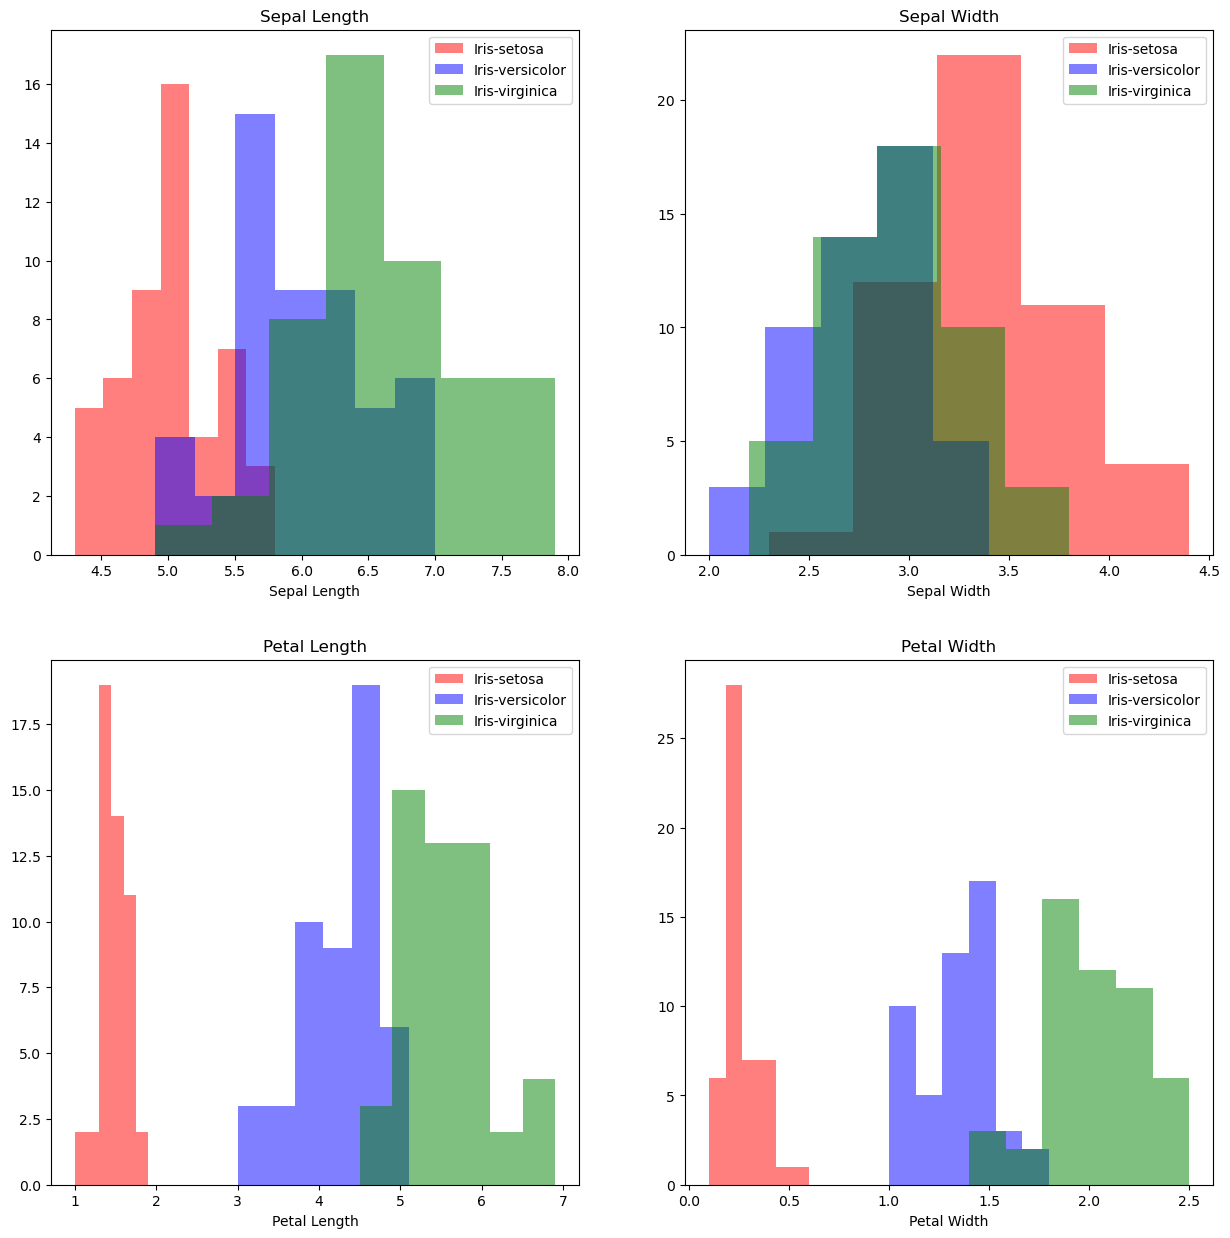

In [37]:
fig, axes = plt.subplots(2,2, figsize = (15,15))            
setosa = iris_data[iris_data.Class == "Iris-setosa"]                  
versicolor = iris_data[iris_data.Class == "Iris-versicolor"]
virginica = iris_data[iris_data.Class == "Iris-virginica"]

# sepal length histogram 
axes[0,0].set_title("Sepal Length")    
axes[0,0].set(xlabel='Sepal Length')
axes[0,0].hist(setosa['Sepal_Length'], bins=7, alpha=0.5, label="Iris-setosa", color='red')            
axes[0,0].hist(versicolor['Sepal_Length'], bins=7, alpha=0.5, label="Iris-versicolor", color='blue')  
axes[0,0].hist(virginica['Sepal_Length'], bins=7, alpha=0.5, label="Iris-virginica", color='green')    
axes[0,0].legend(loc='upper right')                         
    
# sepal width histogram 
axes[0,1].set_title("Sepal Width")    
axes[0,1].set(xlabel='Sepal Width')
axes[0,1].hist(setosa['Sepal_Width'], bins=5, alpha=0.5, label="Iris-setosa", color='red')
axes[0,1].hist(versicolor['Sepal_Width'], bins=5, alpha=0.5, label="Iris-versicolor", color='blue')
axes[0,1].hist(virginica['Sepal_Width'], bins=5, alpha=0.5, label="Iris-virginica", color='green')
axes[0,1].legend(loc='upper right');

# petal length histogram 
axes[1,0].set_title("Petal Length")
axes[1,0].set(xlabel='Petal Length')
axes[1,0].hist(setosa['Petal_Length'], bins=6, alpha=0.5, label="Iris-setosa", color='red')
axes[1,0].hist(versicolor['Petal_Length'], bins=6, alpha=0.5, label="Iris-versicolor", color='blue')
axes[1,0].hist(virginica['Petal_Length'], bins=6, alpha=0.5, label="Iris-virginica", color='green')
axes[1,0].legend(loc='upper right');

# petal width histogram 
axes[1,1].set_title("Petal Width")
axes[1,1].set(xlabel='Petal Width')
axes[1,1].hist(setosa['Petal_Width'], bins=6, alpha=0.5, label="Iris-setosa", color='red')
axes[1,1].hist(versicolor['Petal_Width'], bins=6, alpha=0.5, label="Iris-versicolor", color='blue')
axes[1,1].hist(virginica['Petal_Width'], bins=6, alpha=0.5, label="Iris-virginica", color='green')
axes[1,1].legend(loc='upper right');

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\keith\anaconda3\Lib\s

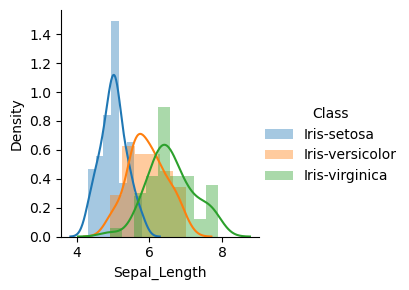

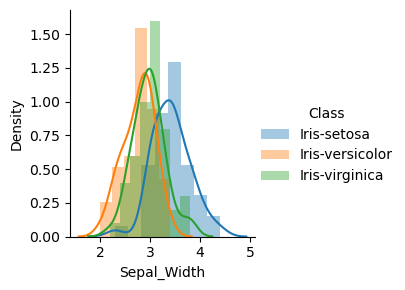

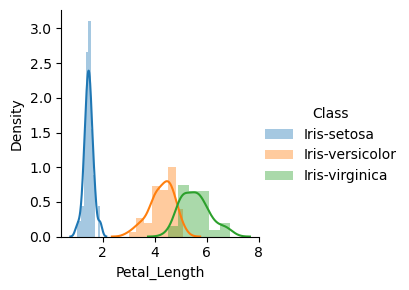

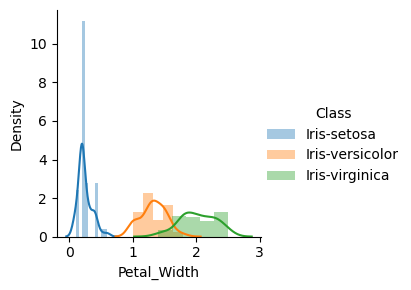

In [49]:
sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Sepal_Length") \
.add_legend()

sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Sepal_Width") \
.add_legend()

sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Petal_Length") \
.add_legend()

sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Petal_Width") \
.add_legend()
plt.show()

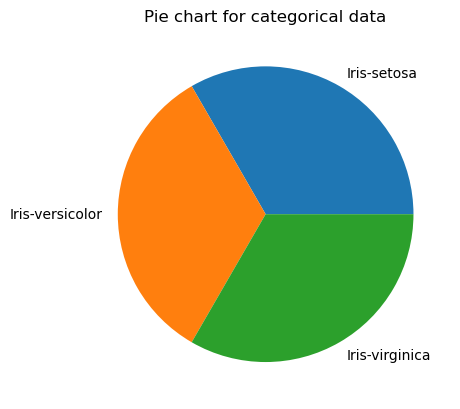

In [50]:
freq = iris_data['Class'].value_counts()
species = freq.index
plt.pie(freq,labels=Class)
plt.title('Pie chart for categorical data')
plt.show()